In [49]:
!pip install torch torchvision


c:\Users\19521\AppData\Local\Programs\Python\Python310\lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


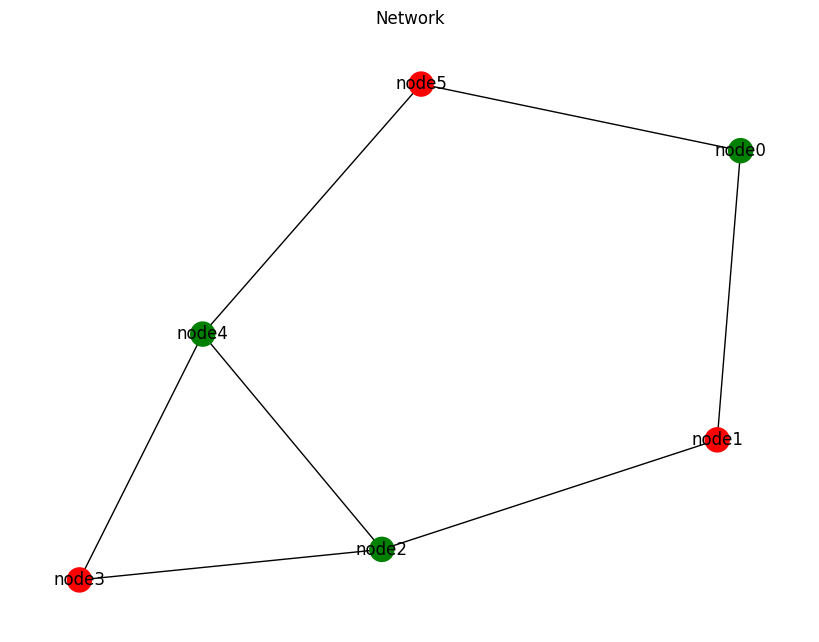

c:\Users\19521\AppData\Local\Programs\Python\Python310\lib\site-packages\torch_geometric\deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/100], Loss: 0.7005
Epoch [2/100], Loss: 0.6929
Epoch [3/100], Loss: 0.6943
Epoch [4/100], Loss: 0.6961
Epoch [5/100], Loss: 0.6949
Epoch [6/100], Loss: 0.6929
Epoch [7/100], Loss: 0.6918
Epoch [8/100], Loss: 0.6921
Epoch [9/100], Loss: 0.6927
Epoch [10/100], Loss: 0.6928
Epoch [11/100], Loss: 0.6921
Epoch [12/100], Loss: 0.6911
Epoch [13/100], Loss: 0.6904
Epoch [14/100], Loss: 0.6902
Epoch [15/100], Loss: 0.6904
Epoch [16/100], Loss: 0.6904
Epoch [17/100], Loss: 0.6901
Epoch [18/100], Loss: 0.6895
Epoch [19/100], Loss: 0.6889
Epoch [20/100], Loss: 0.6886
Epoch [21/100], Loss: 0.6884
Epoch [22/100], Loss: 0.6883
Epoch [23/100], Loss: 0.6881
Epoch [24/100], Loss: 0.6878
Epoch [25/100], Loss: 0.6873
Epoch [26/100], Loss: 0.6869
Epoch [27/100], Loss: 0.6866
Epoch [28/100], Loss: 0.6864
Epoch [29/100], Loss: 0.6862
Epoch [30/100], Loss: 0.6859
Epoch [31/100], Loss: 0.6855
Epoch [32/100], Loss: 0.6852
Epoch [33/100], Loss: 0.6849
Epoch [34/100], Loss: 0.6846
Epoch [35/100], Loss: 0

In [50]:
    import torch
    import torch.nn as nn
    import torch.optim as optim
    from torch_geometric.nn import GCNConv
    from torch_geometric.data import Data, DataLoader
    import networkx as nx
    import matplotlib.pyplot as plt
    import numpy as np

    # Generate a synthetic graph
    G = nx.Graph()

    # Add nodes to the graph with string IDs
    G.add_nodes_from(['node0', 'node1', 'node2', 'node3', 'node4', 'node5'])

    # Define edges using string IDs
    edges = [('node0', 'node1'),('node2', 'node4'), ('node1', 'node2'), ('node2', 'node3'), ('node3', 'node4'), ('node4', 'node5'), ('node5', 'node0')]
    G.add_edges_from(edges)

    # Update the labels and features accordingly
    x = torch.tensor([G.degree(node) for node in G.nodes()], dtype=torch.float32).view(-1, 1)
    y = torch.tensor([1 if int(node[-1]) % 2 == 0 else 0 for node in G.nodes()], dtype=torch.long)

    # Convert the NetworkX graph to a PyTorch Geometric Data object
    data = Data(x=x, edge_index=torch.tensor([(int(edge[0][-1]), int(edge[1][-1])) for edge in G.edges]).t().contiguous(), y=y)

    # Visualize the graph (optional)
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color=['g' if label == 1 else 'r' for label in y], cmap=plt.get_cmap('coolwarm'), node_size=300)
    plt.title('Network')
    plt.show()

    # Define a simple Graph Convolutional Network (GCN) model
    class GCN(nn.Module):
        def __init__(self, num_features, num_classes):
            super(GCN, self).__init__()
            self.conv1 = GCNConv(num_features, 16)
            self.conv2 = GCNConv(16, num_classes)

        def forward(self, data):
            x, edge_index = data.x, data.edge_index
            x = self.conv1(x, edge_index)
            x = torch.relu(x)
            x = self.conv2(x, edge_index)
            return x

    # Create an instance of the GCN model
    model = GCN(num_features=1, num_classes=2)

    # Define the loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    # Create a DataLoader for batch processing (not necessary for this small dataset)

    # Create a DataLoader for batch processing (not necessary for this small dataset)
    loader = DataLoader([data], batch_size=1, shuffle=True)

    # Training loop
    num_epochs = 100
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for batch in loader:
            optimizer.zero_grad()
            output = model(batch)  # Here, batch should be a batch of graphs
            loss = criterion(output, batch.y.view(-1))  # Flatten batch.y
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {total_loss:.4f}')

    # Evaluate the model on the entire graph
    model.eval()
    with torch.no_grad():
        logits = model(data)
        predicted_labels = logits.argmax(dim=1)
        correct = int(predicted_labels.eq(data.y).sum())
        accuracy = correct / len(data.y)
        print(f'Test Accuracy: {accuracy:.4f}')


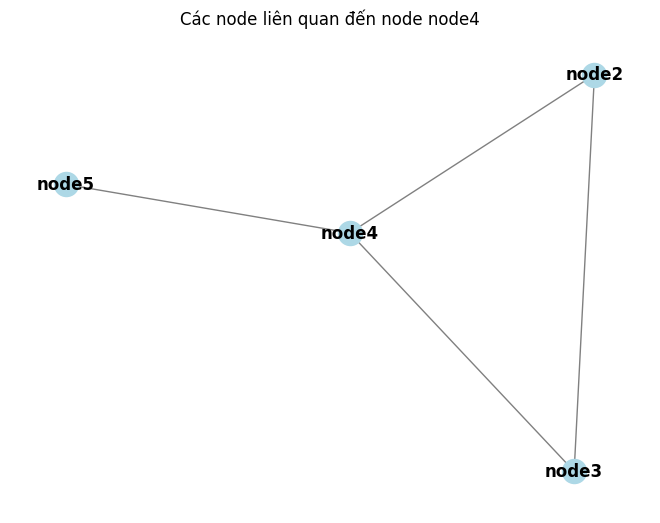

In [54]:

target_node='node4'
related_nodes = [node for node in G.neighbors(target_node)]

if related_nodes:
    subgraph = G.subgraph([target_node] + related_nodes)
    pos = nx.spring_layout(subgraph, seed=42)
    nx.draw(subgraph, pos, with_labels=True, node_color='lightblue', edge_color='gray', font_weight='bold')
    plt.title(f'Các node liên quan đến node {target_node}')
    plt.show()
else:
    print(f'Không tìm thấy node liên quan nào đến node {target_node}.')